In [1]:
import pandas as pd
import os

# Brief Data Analysis

This notebok performs a brief data exploration on our videos and behaviour labels. 

In [6]:
labels_location = '../data/processed/ImageDatasetRGB/labels'
files = os.listdir(labels_location)

if '.ipynb_checkpoints' in files:
    files.remove('.ipynb_checkpoints')
dfs = [pd.read_csv(os.path.join(labels_location, csv)) for csv in files]

## . Class analysis

We will start by exploring if there is any class imbalance among labels.

In [9]:
behaviors = dfs[0].columns

for behavior in behaviors:
    total = 0
    pos = 0
    for df in dfs:
        total += len(df)
        pos += df[behavior].sum()

    print('{} samples:'.format(behavior.capitalize()))
    print('\tPositive samples: {} ({}%)'.format(pos, round(100*pos/total, 4)))
    print('\tTotal samples: {}'.format(total))

Grooming samples:
	Positive samples: 14886 (10.287%)
	Total samples: 144707
Rearing samples:
	Positive samples: 29797 (20.5913%)
	Total samples: 144707


## . Duration analysis

We will then check on average how does every behaviour last.

In [19]:
groomings = []
rearings = []

for df in dfs:
    groom_duration = 0
    rear_duration = 0

    for i, row in df.iterrows():
        if row['grooming'] == 1:
            groom_duration += 1
        else:
            if groom_duration > 5: # append only if the duration > 5
                groomings.append(groom_duration)
            groom_duration = 0
        if row['rearing'] == 1:
            rear_duration += 1
        else:
            if rear_duration > 5:
                rearings.append(rear_duration)
            rear_duration = 0       

In [20]:
import numpy as np

groomings = np.array(groomings)
rearings = np.array(rearings)

print('Groomings Duration: {} frames'.format(groomings.mean()))
print('Rearings Duration: {} frames'.format(rearings.mean()))

Groomings Duration: 102.5 frames
Rearings Duration: 22.383384146341463 frames


In [21]:
print('Max groomings Duration: {} frames'.format(groomings.max()))
print('Min rearings Duration: {} frames'.format(rearings.min()))

Max groomings Duration: 555 frames
Min rearings Duration: 6 frames


To make it more visual we will plot a boxplot for each behaviour.

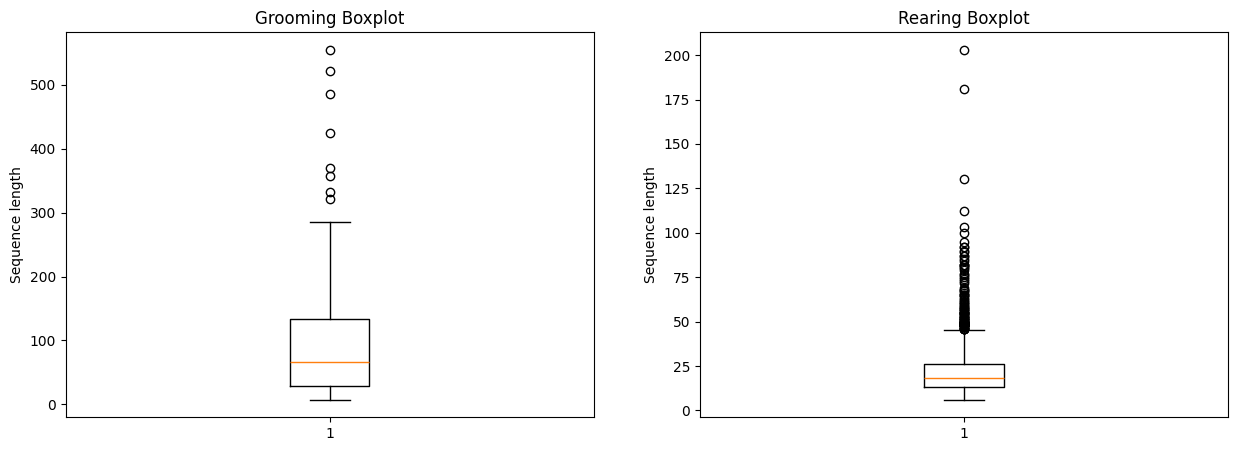

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

figure, axes = plt.subplots(1,2, figsize=(15, 5))
axes[0].boxplot(groomings)
axes[0].set_title('Grooming Boxplot')
axes[0].set_xlabel('')
axes[0].set_ylabel('Sequence length')

axes[1].boxplot(rearings)
axes[1].set_title('Rearing Boxplot')
axes[1].set_xlabel('')
axes[1].set_ylabel('Sequence length')

plt.show()